Tutorial 3: Galaxies
====================

This tutorial introduces `Galaxy` objects, which:

 - Are composed from collections the light and mass profiles introduced in the previous tutorial.
 - Combine these profiles such that their properties (e.g. an image, deflection angles, etc.) are correctly calculated
 as the combination of these profiles.
 - Also have a redshift, which defines where a galaxy is relative to other galaxies in a lensing calculation.

In [1]:
%matplotlib inline
from pyprojroot import here
workspace_path = str(here())
%cd $workspace_path
print(f"Working Directory has been set to `{workspace_path}`")

import autolens as al
import autolens.plot as aplt

/mnt/c/Users/Jammy/Code/PyAuto/autolens_workspace
Working Directory has been set to `/mnt/c/Users/Jammy/Code/PyAuto/autolens_workspace`


__Initial Setup__

Lets use the same `Grid2D` as the previous tutorial.

In [2]:
grid = al.Grid2D.uniform(shape_native=(100, 100), pixel_scales=0.05)

__Galaxies__

Lets make a galaxy with an elliptical Sersic `LightProfile`, by simply passing this profile to a `Galaxy` object.

In [3]:
sersic_light_profile = al.lp.EllSersic(
    centre=(0.0, 0.0),
    elliptical_comps=(0.0, 0.111111),
    intensity=1.0,
    effective_radius=1.0,
    sersic_index=2.5,
)

galaxy_with_light_profile = al.Galaxy(redshift=0.5, light=sersic_light_profile)

print(galaxy_with_light_profile)

Redshift: 0.5
Light Profiles:
EllSersic
centre: (0.0, 0.0)
elliptical_comps: (0.0, 0.111111)
axis_ratio: 0.800000180000018
angle: 0.0
intensity: 1.0
effective_radius: 1.0
sersic_index: 2.5


We have seen that we can pass a 2D grid to a light profile to compute its image via its `image_2d_from_grid` method. We 
can do the exact same with a galaxy:

In [4]:
galaxy_image = galaxy_with_light_profile.image_2d_from_grid(grid=grid)

print("intensity of `Grid2D` pixel 0:")
print(galaxy_image.native[0, 0])
print("intensity of `Grid2D` pixel 1:")
print(galaxy_image.native[0, 1])
print("intensity of `Grid2D` pixel 2:")
print(galaxy_image.native[0, 2])
print("etc.")

intensity of `Grid2D` pixel 0:
0.04609912932176421
intensity of `Grid2D` pixel 1:
0.04723487566981192
intensity of `Grid2D` pixel 2:
0.04838914231548962
etc.


A `GalaxyPlotter` allows us to the plot the image, just like the `LightProfilePlotter` did for a light profile.

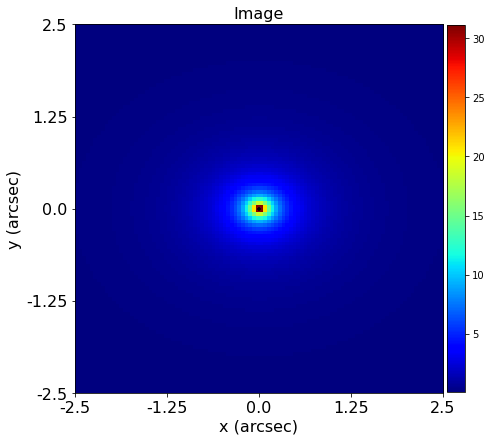

In [5]:
galaxy_plotter = aplt.GalaxyPlotter(galaxy=galaxy_with_light_profile, grid=grid)
galaxy_plotter.figures_2d(image=True)

__Multiple Profiles__

We can pass galaxies as many light profiles as we like to a `Galaxy`, so lets create a galaxy with three light profiles.

In [6]:
light_profile_1 = al.lp.SphSersic(
    centre=(0.0, 0.0), intensity=1.0, effective_radius=1.0, sersic_index=2.5
)

light_profile_2 = al.lp.SphSersic(
    centre=(1.0, 1.0), intensity=1.0, effective_radius=2.0, sersic_index=3.0
)

light_profile_3 = al.lp.SphSersic(
    centre=(1.0, -1.0), intensity=1.0, effective_radius=2.0, sersic_index=2.0
)

galaxy_with_3_light_profiles = al.Galaxy(
    redshift=0.5,
    light_1=light_profile_1,
    light_2=light_profile_2,
    light_3=light_profile_3,
)

print(galaxy_with_3_light_profiles)

Redshift: 0.5
Light Profiles:
SphSersic
centre: (0.0, 0.0)
elliptical_comps: (0.0, 0.0)
axis_ratio: 1.0
angle: 0.0
intensity: 1.0
effective_radius: 1.0
sersic_index: 2.5
SphSersic
centre: (1.0, 1.0)
elliptical_comps: (0.0, 0.0)
axis_ratio: 1.0
angle: 0.0
intensity: 1.0
effective_radius: 2.0
sersic_index: 3.0
SphSersic
centre: (1.0, -1.0)
elliptical_comps: (0.0, 0.0)
axis_ratio: 1.0
angle: 0.0
intensity: 1.0
effective_radius: 2.0
sersic_index: 2.0


If we plot the galaxy, we see 3 blobs of light!

(The image of multiple light profiles is simply the sum of the image of each individual light profile).

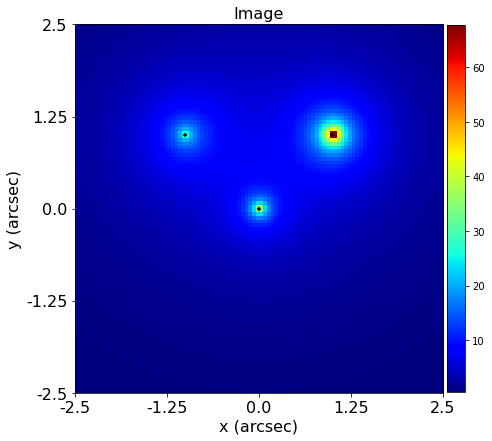

In [7]:
galaxy_plotter = aplt.GalaxyPlotter(galaxy=galaxy_with_3_light_profiles, grid=grid)
galaxy_plotter.figures_2d(image=True)

We can also plot each individual `LightProfile` using the plotter's `subplot_of_light_profiles` method.

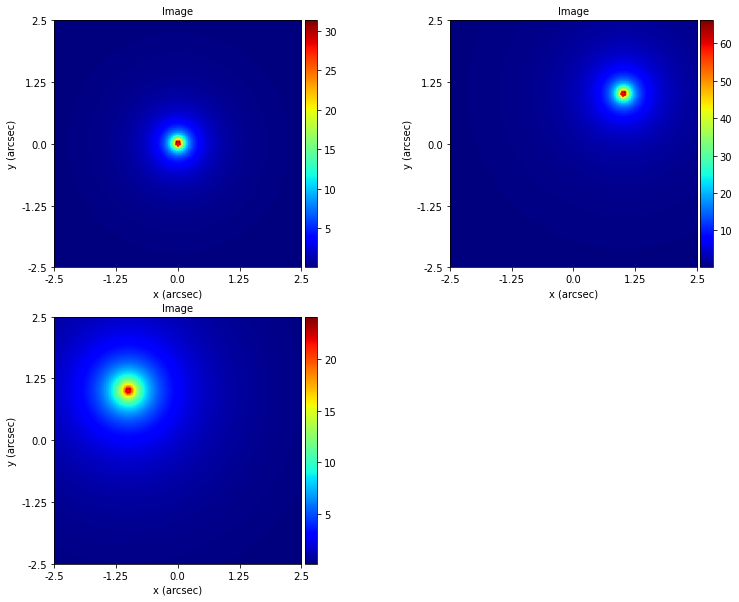

In [8]:
galaxy_plotter.subplot_of_light_profiles(image=True)

We can pass mass profiles to a `Galaxy` object in the exact same way as light profiles. Lets create a `Galaxy` with 
three spherical isothermal mass profile's. 

In [9]:
mass_profile_1 = al.mp.SphIsothermal(centre=(0.0, 0.0), einstein_radius=1.0)

mass_profile_2 = al.mp.SphIsothermal(centre=(1.0, 1.0), einstein_radius=1.0)

mass_profile_3 = al.mp.SphIsothermal(centre=(1.0, -1.0), einstein_radius=1.0)

galaxy_with_3_mass_profiles = al.Galaxy(
    redshift=0.5, mass_1=mass_profile_1, mass_2=mass_profile_2, mass_3=mass_profile_3
)

print(galaxy_with_3_mass_profiles)

Redshift: 0.5
Mass Profiles:
SphIsothermal
centre: (0.0, 0.0)
elliptical_comps: (0.0, 0.0)
axis_ratio: 1.0
angle: 0.0
einstein_radius: 1.0
slope: 2.0
core_radius: 0.0
SphIsothermal
centre: (1.0, 1.0)
elliptical_comps: (0.0, 0.0)
axis_ratio: 1.0
angle: 0.0
einstein_radius: 1.0
slope: 2.0
core_radius: 0.0
SphIsothermal
centre: (1.0, -1.0)
elliptical_comps: (0.0, 0.0)
axis_ratio: 1.0
angle: 0.0
einstein_radius: 1.0
slope: 2.0
core_radius: 0.0


We can use a `GalaxyPlotter` to plot the deflection angles of this galaxy, which is the deflection angles due to 
three separate spherical isothermal mass profiles. 

(The deflection angles of multiple mass profiles are simply the sum of the deflection angles of each individual mass
profile).

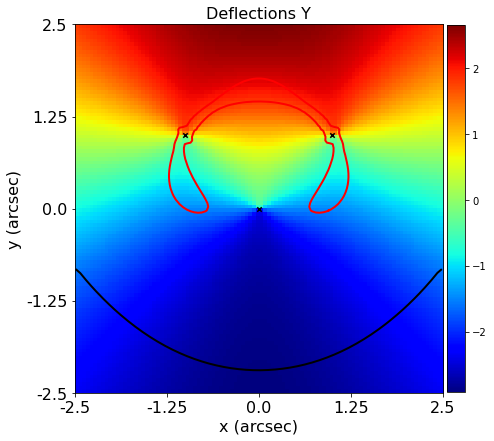

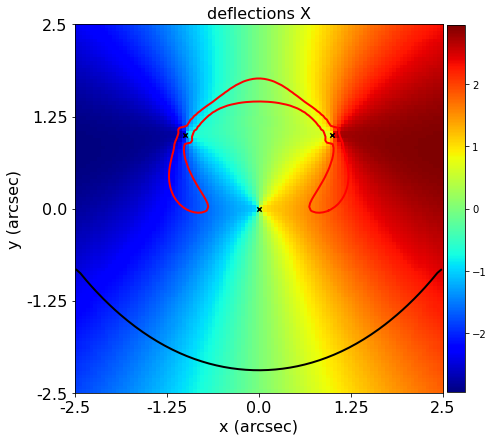

In [10]:
galaxy_plotter = aplt.GalaxyPlotter(galaxy=galaxy_with_3_mass_profiles, grid=grid)
galaxy_plotter.figures_2d(deflections_y=True, deflections_x=True)

I wonder what 3 summed convergence maps or potential`s look like ;).

(These are again the sum of the individual mass profile convergences or potentials).

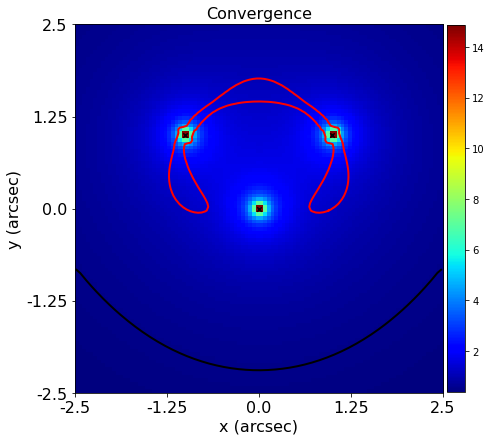

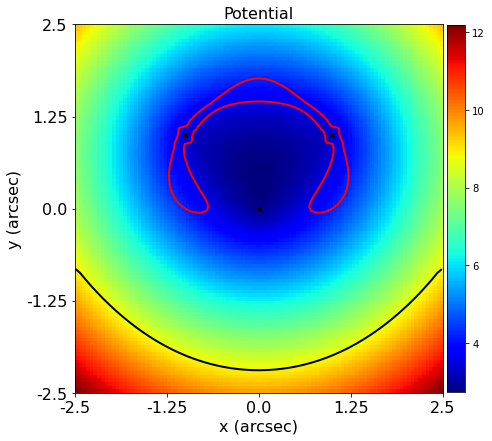

In [11]:
galaxy_plotter.figures_2d(convergence=True, potential=True)

Finally, a `Galaxy` can take both light and mass profiles, and there is no limit to how many we pass it!

In [12]:
light_profile_1 = al.lp.SphSersic(
    centre=(0.0, 0.0), intensity=1.0, effective_radius=1.0, sersic_index=1.0
)

light_profile_2 = al.lp.SphSersic(
    centre=(1.0, 1.0), intensity=1.0, effective_radius=2.0, sersic_index=2.0
)

light_profile_3 = al.lp.SphSersic(
    centre=(2.0, 2.0), intensity=1.0, effective_radius=3.0, sersic_index=3.0
)

light_profile_4 = al.lp.EllSersic(
    centre=(1.0, -1.0),
    elliptical_comps=(0.3, 0.0),
    intensity=1.0,
    effective_radius=1.0,
    sersic_index=1.0,
)

mass_profile_1 = al.mp.SphIsothermal(centre=(0.0, 0.0), einstein_radius=1.0)

mass_profile_2 = al.mp.SphIsothermal(centre=(1.0, 1.0), einstein_radius=2.0)

mass_profile_3 = al.mp.SphIsothermal(centre=(2.0, 2.0), einstein_radius=3.0)

mass_profile_4 = al.mp.EllIsothermal(
    centre=(1.0, -1.0), elliptical_comps=(0.333333, 0.0), einstein_radius=2.0
)

galaxy_with_many_profiles = al.Galaxy(
    redshift=0.5,
    light_1=light_profile_1,
    light_2=light_profile_2,
    light_3=light_profile_3,
    light_4=light_profile_4,
    mass_1=mass_profile_1,
    mass_2=mass_profile_2,
    mass_3=mass_profile_3,
    mass_4=mass_profile_4,
)

Suffice to say, this `Galaxy`'s images, convergence, potential and deflections look pretty interesting.

/home/jammy/venvs/PyAuto/lib/python3.8/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


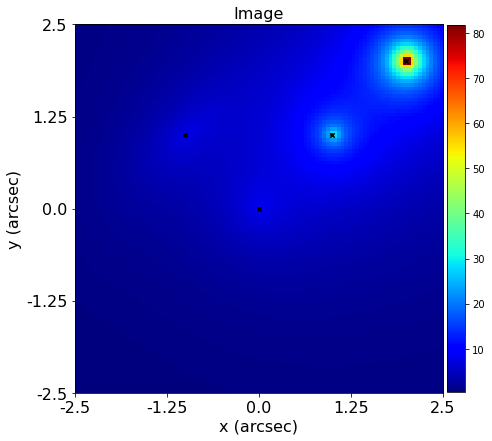

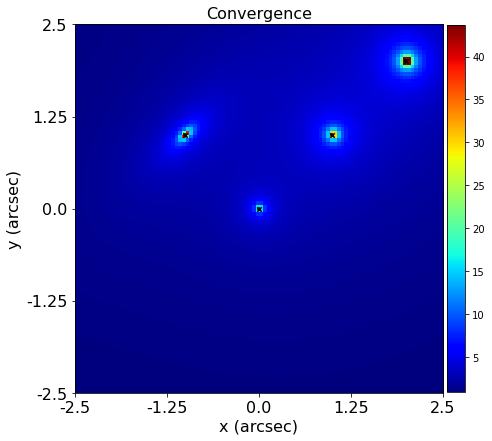

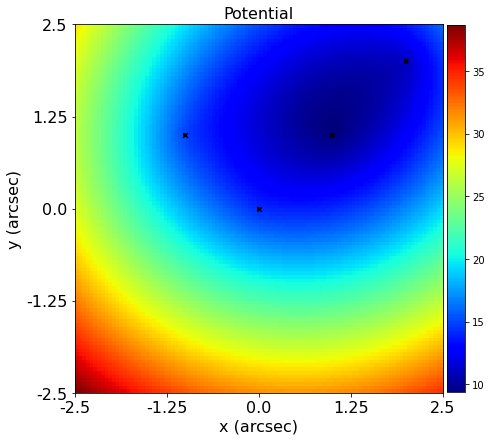

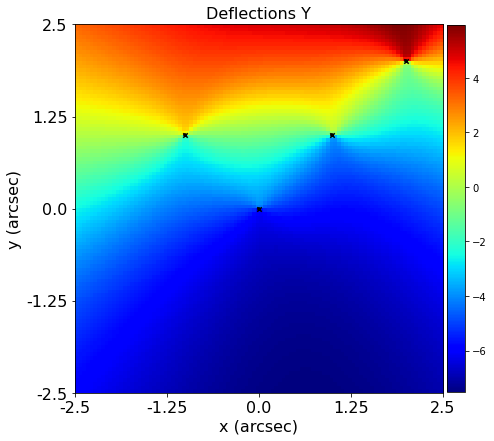

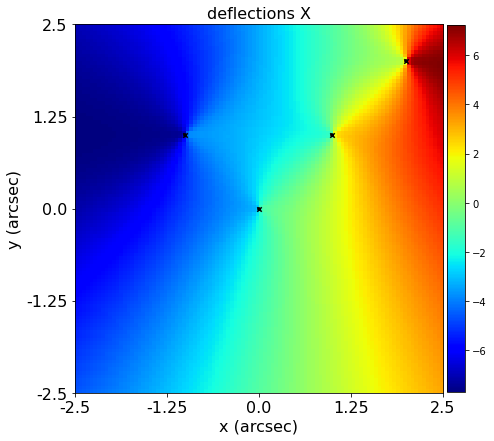

In [13]:
galaxy_plotter = aplt.GalaxyPlotter(galaxy=galaxy_with_many_profiles, grid=grid)
galaxy_plotter.figures_2d(
    image=True, convergence=True, potential=True, deflections_y=True, deflections_x=True
)

__Wrap Up__

Tutorial 3 complete! Lets finish with just one question:

 1) We've learnt that by grouping light and mass profiles into a galaxy we can sum the contribution of each profile to 
 compute the galaxy's image, convergence, deflection angles, etc. 
 
 In strong lensing, there may be multiple galaxies (at the same redshift) next to one another. How might we combine 
 these galaxies to calculate their light and mass profile quantities?